# Programming Assignment 2: Wiener and Poisson Processes

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
print "Modules Imported!"

Modules Imported!


## The Wiener Process

We will now use Python to construct, plot, and manipulate (discrete approximations to) sample paths of Wiener processes. In the lectures, we have constructed the Wiener process as a continuous-time limit of random walks: Let $(U_t)_{t \in {\mathbb Z}_+}$ be an i.i.d. sequence of Rademacher random variables, that is, ${\mathbf P}[U_t = \pm 1] = \frac{1}{2}$ for all $t$. Fix two positive parameters $h > 0$ and $\tau > 0$ and define a continuous-time stochastic signal $W = (W_t)_{t \ge 0}$ with the initial condition $W_0 = 0$ as a linear interpolation of the random points 

$$
W_{n\tau} = h (U_0 + U_1 + \ldots + U_{n-1}), \qquad n = 1,2,3,\ldots.
$$

The Wiener process with diffusion parameter $D$ arises when we take the continuous-time limit $\tau \to 0$, while ensuring that $h^2/\tau = D$.

In this assignment, we will use an alternative construction of the Wiener process, using standard normal increments. To that end, let $(Z_t)_{t \in {\mathbb Z}_+}$ be a sequence of i.i.d. $N(0,1)$ random variables. Fix a small parameter $h > 0$ and define a continuous-time stochastic signal $W = (W_t)_{t \ge 0}$ with zero initial condition $W_0 = 0$ as a linear interpolation of the random points

$$
W_{nh} = \sqrt{Dh} (Z_0 + Z_1 + \ldots Z_{n-1}), \qquad n = 1,2,3,\ldots.
$$

The code below constructs such a signal on a given interval $[0,t_{{\max}}]$ for given values of $D$ and $h$ and plots it.

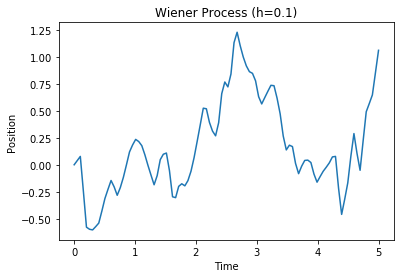

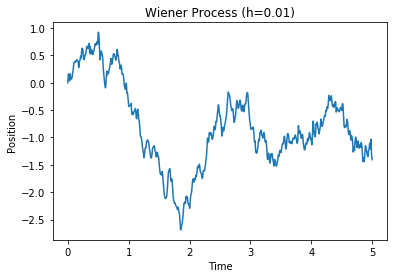

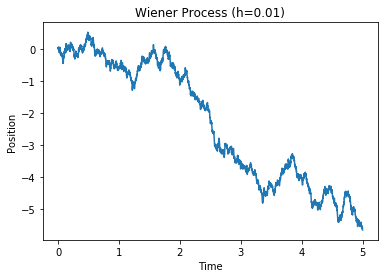

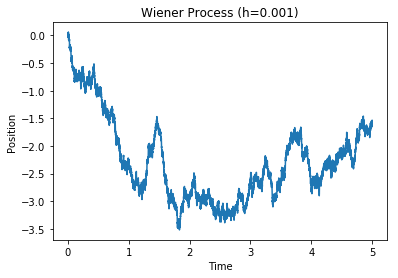

In [2]:
# define WienerProcess: this function will produce random output
# D: diffusion constant (set D=1 for standard Wiener process)
# h: timescale
# tmax: length of time interval
def WienerProcess(D,h,tmax):
    z = np.random.normal(size = int(tmax/h)-1) # generate a sequence of iid N(0,1) random increments
    zsums = np.append([0],np.cumsum(np.sqrt(D*h) * z)) # compute scaled running sums of the increments
    tvals = np.linspace(0,tmax,tmax*int(1/h)) # define the interpolation times
    t = np.linspace(0,tmax,10*int(1/h))
    w = np.interp(t,tvals,zsums) # construct linear interpolation of w
    return (t,w) 

# generate four successively better approximations of standard Wiener process
(t1,W1) = WienerProcess(1,0.1,5)
(t2,W2) = WienerProcess(1,0.01,5)
(t3,W3) = WienerProcess(1,0.001,5)
(t4,W4) = WienerProcess(1,0.0001,5)

# plot these approximations
# use plt.figure() to initialize a new plot
plt.figure() 
plt.plot(t1,W1)
plt.title('Wiener Process (h=0.1)')
plt.xlabel('Time')
plt.ylabel('Position')

plt.figure()
plt.plot(t2,W2)
plt.title('Wiener Process (h=0.01)')
plt.xlabel('Time')
plt.ylabel('Position')

plt.figure()
plt.plot(t3,W3)
plt.title('Wiener Process (h=0.01)')
plt.xlabel('Time')
plt.ylabel('Position')

plt.figure()
plt.plot(t4,W4)
plt.title('Wiener Process (h=0.001)')
plt.xlabel('Time')
plt.ylabel('Position')

<b>Problem 1.</b> By now you know that if $W = (W_t)_{t \ge 0}$ is a Wiener process with diffusion constant $D$, its time-rescaled version $V = (V_t)_{t \ge 0}$ with 

$$
V_t = \sqrt{c} W_{t/c}
$$

for some $c > 0$ is also a Wiener process with the same diffusion constant. 

Use the code cell below to generate sample paths of time-rescaled Wiener processes. Your function should take the following inputs: diffusion constant $D$, time scale $h$, maximum time $t_{{\max}}$, rescaling parameter $c$. Generate and plot sample paths of time-rescaled Wiener processes with $D = 2$, $h=0.001$, $t_{{\max}} = 5$ and $c = 0.01, 0.1, 1, 10, 100$. 

0.01 499995 -4.7189745787
0.1 50000 -0.299756927102
1 5000 -0.0289106598335
10 500 2.53324148025
100 50 1.6430660815


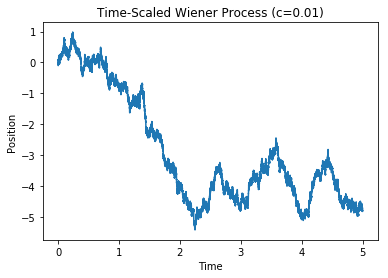

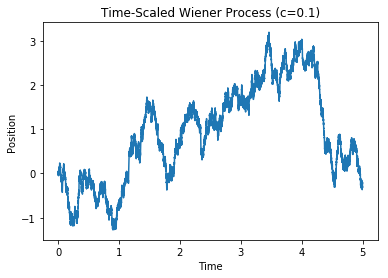

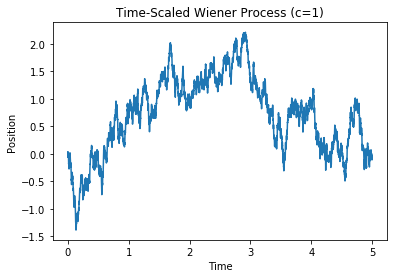

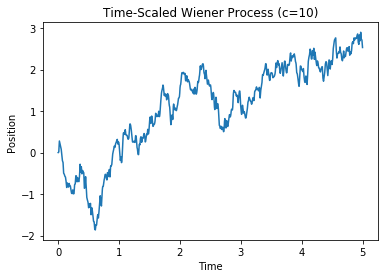

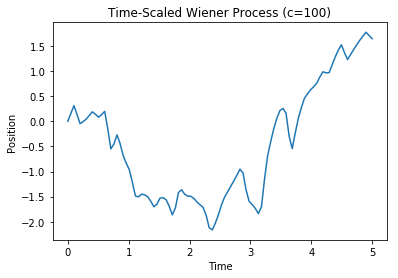

In [3]:
###### student code for Problem 1 goes here ######
# define WienerProcess: this function will produce random output
# D: diffusion constant (set D=1 for standard Wiener process)
# h: timescale
# tmax: length of time interval
def TimeScaledWienerProcess(D,h,tmax,c):
    h_ = h*c
    z = np.sqrt(c)*np.random.normal(size = tmax*int(1/h_)-1) # generate a sequence of iid N(0,1) random increments
    zsums = np.append([0],np.cumsum(np.sqrt(D*h) * z)) # compute scaled running sums of the increments
    tvals = np.linspace(0,tmax,tmax*int(1/h_)) # define the interpolation times
    t = np.linspace(0,tmax,10*int(1/h_))
    print c,len(tvals), zsums[-1]
    w = np.interp(t,tvals,zsums) # construct linear interpolation of w
    return (t,w) 

# generate four successively better approximations of standard Wiener process
(t1,W1) = TimeScaledWienerProcess(2,0.001,5,0.01)
(t2,W2) = TimeScaledWienerProcess(2,0.001,5,0.1)
(t3,W3) = TimeScaledWienerProcess(2,0.001,5,1)
(t4,W4) = TimeScaledWienerProcess(2,0.001,5,10)
(t5,W5) = TimeScaledWienerProcess(2,0.001,5,100)

# plot these approximations
# use plt.figure() to initialize a new plot
plt.figure() 
plt.plot(t1,W1)
plt.title('Time-Scaled Wiener Process (c=0.01)')
plt.xlabel('Time')
plt.ylabel('Position')

plt.figure()
plt.plot(t2,W2)
plt.title('Time-Scaled Wiener Process (c=0.1)')
plt.xlabel('Time')
plt.ylabel('Position')

plt.figure()
plt.plot(t3,W3)
plt.title('Time-Scaled Wiener Process (c=1)')
plt.xlabel('Time')
plt.ylabel('Position')

plt.figure()
plt.plot(t4,W4)
plt.title('Time-Scaled Wiener Process (c=10)')
plt.xlabel('Time')
plt.ylabel('Position')

plt.figure()
plt.plot(t5,W5)
plt.title('Time-Scaled Wiener Process (c=100)')
plt.xlabel('Time')
plt.ylabel('Position')

<b>Problem 2.</b> As a sanity check, modify the above code for WienerProcess to implement the construction from the lecture notes, where the random increments $U_0,U_1,\ldots$ are i.i.d. Rademacher random variables, i.e., ${\bf P}[U_k = \pm 1] = \frac{1}{2}$. To generate the Rademacher samples, you will need the following Python code that outputs an array containing $n$ i.i.d.\ ${\rm Bern}(p)$ ranodm variables:

Use the code cell below to write your modified code and to plot four sample paths with the same parameters as above. You should be seeing roughly the same behavior as in the case of i.i.d. standard normal increments.

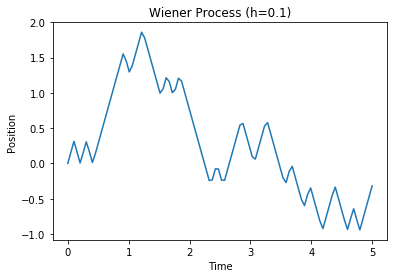

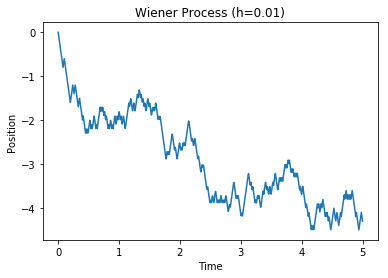

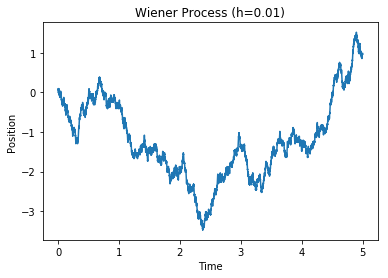

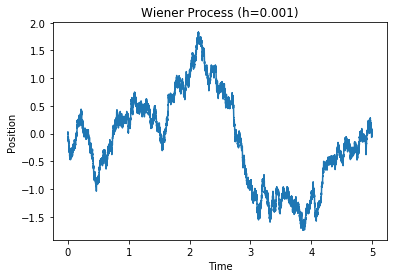

In [4]:
###### student code for Problem 2 goes here ######
# define WienerProcess: this function will produce random output
# D: diffusion constant (set D=1 for standard Wiener process)
# h: timescale
# tmax: length of time interval
def WienerProcess(D,h,tmax):
    z = np.random.binomial(1,0.5, size = int(tmax/h)-1) # generate a sequence of iid N(0,1) random increments
    z[z==0] = -1
    zsums = np.append([0],np.cumsum(np.sqrt(D*h) * z)) # compute scaled running sums of the increments
    tvals = np.linspace(0,tmax,tmax*int(1/h)) # define the interpolation times
    t = np.linspace(0,tmax,10*int(1/h))
    w = np.interp(t,tvals,zsums) # construct linear interpolation of w
    return (t,w) 

# generate four successively better approximations of standard Wiener process
(t1,W1) = WienerProcess(1,0.1,5)
(t2,W2) = WienerProcess(1,0.01,5)
(t3,W3) = WienerProcess(1,0.001,5)
(t4,W4) = WienerProcess(1,0.0001,5)

# plot these approximations
# use plt.figure() to initialize a new plot
plt.figure() 
plt.plot(t1,W1)
plt.title('Wiener Process (h=0.1)')
plt.xlabel('Time')
plt.ylabel('Position')

plt.figure()
plt.plot(t2,W2)
plt.title('Wiener Process (h=0.01)')
plt.xlabel('Time')
plt.ylabel('Position')

plt.figure()
plt.plot(t3,W3)
plt.title('Wiener Process (h=0.01)')
plt.xlabel('Time')
plt.ylabel('Position')

plt.figure()
plt.plot(t4,W4)
plt.title('Wiener Process (h=0.001)')
plt.xlabel('Time')
plt.ylabel('Position')

## The Poisson Process

Our second set of problems concerns the Poisson process. Recall that we can construct a Poisson process $N = (N_t)_{t \ge 0}$ with arrival rate $\lambda$ as follows. Let $Z_0,Z_1,\ldots$ be a sequence of i.i.d. ${\rm Exp}(\lambda)$ random variables. Define the random arrival times $T_1,T_2,\ldots$ by

$$
T_i = Z_0 + \ldots + Z_{i-1}, \qquad i = 1,2,\ldots
$$

and for every $t \ge 0$ take

$$
N_t = \sum^\infty_{i=1} u(t-T_i),
$$

where $u(\cdot)$ is the unit step function.

The Python code below generates a sample path of a Poisson process with a given rate up to a given number of arrivals.

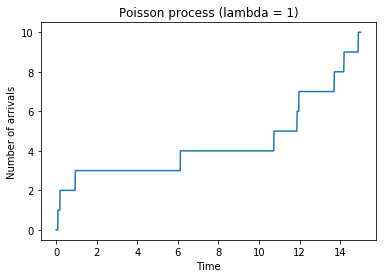

In [5]:
# define UnitStep
def UnitStep(t): # the input to UnitStep is an array of reals
    return np.where(t<0, 0., 1.) # returns an array of 0's (where entries of t are negative) and 1's (otherwise)

# define PoissonProcess: this function will produce random output
# rate: arrival rate (mean number of arrivals per unit time)
# nmax: total number of arrivals
def PoissonProcess(rate,nmax):
    z = np.random.exponential(1/rate,size=nmax) # generate i.i.d. sequence of interarrival times
    arrivals = np.cumsum(z) # compute arrival times T1, ..., Tn
    t = np.linspace(0,int(arrivals[-1])+1,1000) # define time interval from t=0 to t=T_n
    n = [np.sum([UnitStep(time-arrival) for arrival in arrivals]) for time in t] 
    return (t,n)

# generate a sample path of unit Poisson process with 10 arrivals and plot it
(a,N) = PoissonProcess(1,10)

plt.figure()
plt.plot(a,N)
plt.title('Poisson process (lambda = 1)')
plt.xlabel('Time')
plt.ylabel('Number of arrivals')

<b>Problem 3:</b> The code above produces a segment of a Poisson process on the <i>random</i> interval $[0,T_n]$, where $T_n$ is the $n$th arrival time for a given value of $n$, whereas ourr code for the Wiener process generated sample paths on a given interval $[0,t_{{\max}}]$. 

In the code cell below, construct a new function that would generate a sample path of a Poisson process with a given rate on a given interval $[0,t_{\max}]$. To do this, use the discrete-time approximation discussed in class, where you chop the interval $[0,t_{\max}]$ into $n$ subintervals, for a very large $n$, and then let the arrivals be represented by $n$ i.i.d. Bernoulli random variables with bias $p = \lambda t_{\max}/n$. Your function should take the following inputs: the arrival rate $\lambda$ and the maximum time $t_{{\max}}$. You will need to set the number of subintervals $n$ large enough, so that $\lambda t_{\max} < n$. You may find the UnitStep function useful. 

Plot the resulting sample paths for $\lambda = 1,2,4,10$ and for $t_{\max} = 5$.

array([ 1.8 ,  2.15,  2.45,  2.9 ,  2.95,  4.2 ])

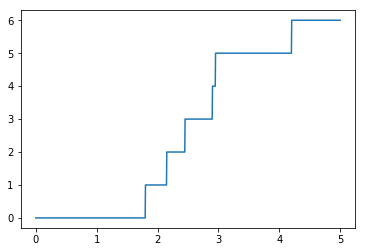

In [6]:
n = 100
tmax = 5
rate = 1
z = np.random.binomial(1,rate*tmax/float(n),size = n)
arrivals = tmax / float(n) * np.where(z<>0)[0]
#plt.plot(t1,P1)
t = np.linspace(0,tmax,1000)
p = [np.sum([UnitStep(time-arrival) for arrival in arrivals]) for time in t]
plt.plot(t,p)
arrivals

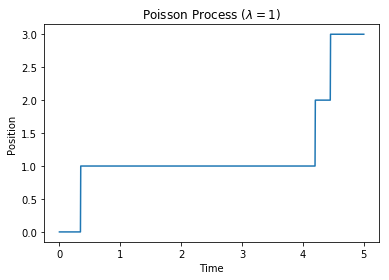

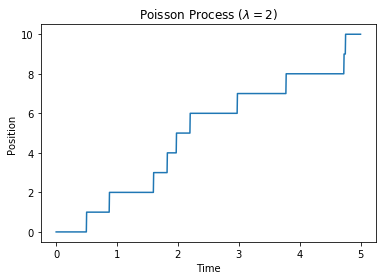

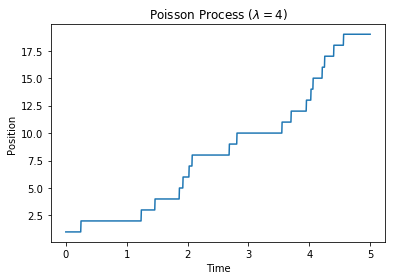

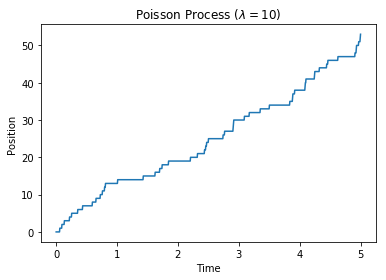

In [7]:
###### student code for Problem 3 goes here ######
# define WienerProcess2: this function will produce random output
# D: diffusion constant (set D=1 for standard Wiener process)
# h: timescale
# tmax: length of time interval
def PoissonProcess2(rate,tmax):
    """two methods, first one without unit func interpolation, second with"""
    #n = 1000
    #z = np.random.binomial(1,rate*tmax/float(n),size = n) # generate a sequence of iid N(0,1) bernoulli increments
    #zsums = np.cumsum(z) # compute scaled running sums of the increments
    #time = np.linspace(0,tmax,n) # chop time interval to subintervals
    #return time, zsums
    n = 20*rate*tmax
    z = np.random.binomial(1,rate*tmax/float(n),size = n) # generate a sequence of iid N(0,1) bernoulli increments
    arrivals = tmax / float(n) * np.where(z<>0)[0]
    time = np.linspace(0,tmax,tmax*1000) # chop time interval to subintervals
    t = np.linspace(0, tmax, 1000)
    n = [np.sum([UnitStep(time-arrival) for arrival in arrivals]) for time in t] 
    return t,n


# generate a sample path of unit Poisson process with tmax=5 and plot it
(t1,P1) = PoissonProcess2(1,5)
(t2,P2) = PoissonProcess2(2,5)
(t3,P3) = PoissonProcess2(4,5)
(t4,P4) = PoissonProcess2(10,5)

# plot these approximations
# use plt.figure() to initialize a new plot
plt.figure() 
plt.plot(t1,P1)
plt.title('Poisson Process ($\lambda=1$)')
plt.xlabel('Time')
plt.ylabel('Position')

plt.figure()
plt.plot(t2,P2)
plt.title('Poisson Process ($\lambda=2$)')
plt.xlabel('Time')
plt.ylabel('Position')

plt.figure()
plt.plot(t3,P3)
plt.title('Poisson Process ($\lambda=4$)')
plt.xlabel('Time')
plt.ylabel('Position')

plt.figure()
plt.plot(t4,P4)
plt.title('Poisson Process ($\lambda=10$)')
plt.xlabel('Time')
plt.ylabel('Position')

<b>Problem 4:</b> Poisson processes are used to model situations where discrete events happen at random times. For example, a Poisson process with rate $\lambda$ can be used to model the number of customers arriving at a ticket counter in the airport, where $\lambda$ is the average number of new customer arrivals per unit time. 

In this problem, we will consider the situation when there are several independent queues of customers arriving at the counter. Formally, let $m$ be the number of queues, and for each $k \in \{ 1,\ldots,m \}$ let $N^{(k)} = (N^{(k)}_t)_{t \ge 0}$ be a Poisson process with rate $\lambda_k$. Thus, $\lambda_k$ is the average number of customers arrivals per unit time via the $k$th queue. We assume that these Poisson processes are mutually independent. The total number of arrivals at the counter at time $t$ is then

$$
N_t = \sum^m_{k=1} N^{(k)}_t.
$$

In the cell below, adapt your code from Problem 3 to generate two independent Poisson processes with rates $\lambda_1 = 3$ and $\lambda_2 = 5$ on the interval $[0,10]$ and plot the sample path of their sum.

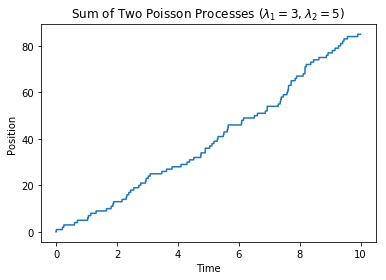

In [8]:
###### student code for Problem 4 goes here ######
def PoissonProcess3(rate1, rate2,tmax):
    n = 10000
    z1 = np.random.binomial(1,rate1*tmax/float(n),size = n) # generate a sequence of iid N(0,1) bernoulli increments
    z2 = np.random.binomial(1,rate2*tmax/float(n),size = n)
    zsums = np.cumsum(z1+z2) # compute scaled running sums of the increments
    time = np.linspace(0,tmax,n) # chop time interval to subintervals
    return time, zsums
(t1,P1) = PoissonProcess3(3,5,10)

plt.figure()
plt.plot(t1,P1)
plt.title('Sum of Two Poisson Processes ($\lambda_1=3,\lambda_2=5$)')
plt.xlabel('Time')
plt.ylabel('Position')

In the markdown cell below, comment on what you see. Do you think that the sum process $N$ is also a Poisson process?  If so, why do you think so, and what do you think its arrival rate is? 

<i>Hint:</i> Consider two independent Poisson random variables $X \sim {\rm Pois}(\lambda_1)$ and $Y \sim {\rm Pois}(\lambda_2)$. Prove that their sum $X + Y$ is also a Poisson random variable with parameter $\lambda_1 + \lambda_2$. Now let $N^{(1)}$ and $N^{(2)}$ be two independent Poisson processes with rates $\lambda_1$ and $\lambda_2$, respectively, and analyze the increments $N_t - N_s$ of the sum $N_t = N^{(1)}_t + N^{(2)}_t$.

----- student answer for Problem 4 goes here -----  
  
N is Poisson process. The arriving rate is $\lambda_1 + \lambda_2$. The following is the proof.  
  
Proof:  
We need to check the three defining properties of the Poisson process.  

  
(Zero initial condition) $N_0 = N_0^{(1)}+N_0^{(2)}$.  
(Independent increments) For $0 \le r \le t$, $N_t - N_s = N_t^{(1)}+N_t^{(2)}- (N_s^{(1)}+N_s^{(2)})$ is independent of $N_r = N_r^{(1)}+N_r^{(2)}$.  

(Stationary Poisson increments) For any $0 \le s \le t$,  
 
$P[N_t-N_s=k] = \displaystyle\sum_{k_1=0}^kP[N_t^{(1)}-N_s^{(1)}=k_1,N_t^{(2)}-N_s^{(2)}=k-k_1]$ 

$\because$ both $N_t^{(1)}, N_t^{(2)}$ are independent Poisson Process.  

$\therefore P[N_t^{i} = k_i] = \frac{e^{-\lambda_it}(\lambda_it)^k_i}{k_i!}$  
\begin{align*}
P[N_t-N_s=k] &= \displaystyle\sum_{k_1=0}^k P[N_t^{1}=k_1]P[N_t^{(2)}-N_s^{(2)}=k_2]&\\
			&=\displaystyle\sum_{k_1=0}^k \frac{e^{-\lambda_1(t-s)}(\lambda_1(t-s))^{k_1}}{k_1!}\cdot \frac{e^{-\lambda_2(t-s)}(\lambda_2(t-s))^{(k-k_1)}}{(k-k_1)!}\\
            &=e^{-(\lambda_1+\lambda_2)(t-s)}\displaystyle\sum_{k_1=0}^k \frac{(\lambda_1(t-s)^{k_1})(\lambda_2(t-s))^{k-k_1}}{k_1!(k-k_1)!}
\end{align*}
By Binomial Coefficient, we have $
\displaystyle\sum_{k_1=0}^k \frac{(\lambda_1(t-s)^{k_1})(\lambda_2(t-s))^{k-k_1}}{k_1!(k-k_1)!} = \frac{(\lambda_1(t-s)+\lambda_2(t-s))^k}{k!}$  

$\therefore P[N_t-N_s=k] = \frac{e^{(\lambda_1+\lambda_2)(t-s)}((\lambda_1+\lambda_2)(t-s))^k}{k!}$

$\therefore N_t-N_s \sim Pois(0, \lambda(t-s))$, where $\lambda = \lambda _1+\lambda_2$.  

In the proof of property (iii), we can easily get the arrival rate for $N$ is $\lambda_1 + \lambda_2$

<b>Problem 5:</b> Now we consider the opposite situation: customers arrive at a rate of $\lambda$, but each new customer independently decides to join one of two queues with respective probabilities $p$ and $1-p$. That is, we have a Poisson process $N = (N_t)_{t \ge 0}$ with rate $\lambda$, and then we form two counting processes $N^{(1)} = (N_t)_{t \ge 0}$ and $N^{(2)} = (N^{(2)}_t)_{t \ge 0}$ as follows:

Let $T_1,T_2,\ldots$ be the arrival times of $N$, and let $U_1,U_2,\ldots$ be i.i.d. ${\rm Bern}(p)$ random variables that are also independent of all the arrival times. Then

$$
N^{(1)}_t = \sum^{N_t}_{i=1} U_{N_{T_i}}
$$

and

$$
N^{(2)}_t = \sum^{N_t}_{i=1} (1-U_{N_{T_i}}).
$$

Use your code from Problem 3 to model such a situation. Plot the resulting sample paths of $N$, $N^{(1)}$, and $N^{(2)}$ with the following parameters: $\lambda = 2$, $p = 0.4$, $t_{\max} = 10$.

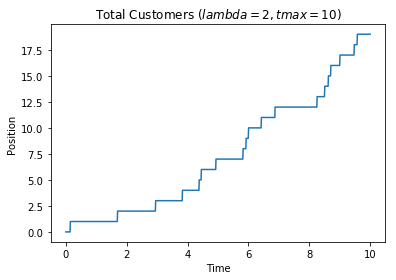

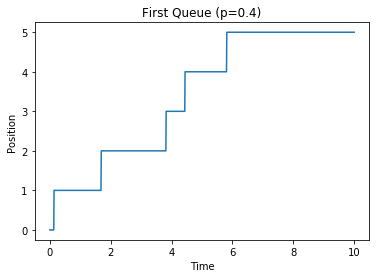

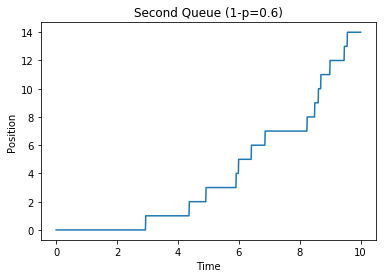

In [20]:
###### student code for Problem 5 goes here ######
t, n = PoissonProcess2(2,10) # get the array from problem 3, rate = 2, tmax=10
arrivals = np.diff(n) # get the every customer's arrival time (in timescale counter)
arrivals = 10 / float(len(t)) * np.where(arrivals<>0)[0] # arrival time (in time)
z = np.random.binomial(1,0.4,size = len(arrivals)) # split two queues
arrivals1 = arrivals[z<>0]
arrivals2 = arrivals[z==0]
n1 = [np.sum([UnitStep(time-arrival) for arrival in arrivals1]) for time in t]
n2 = [np.sum([UnitStep(time-arrival) for arrival in arrivals2]) for time in t]

# plot
plt.figure()
plt.plot(t,n)
plt.title('Total Customers ($lambda=2, tmax=10$)')
plt.xlabel('Time')
plt.ylabel('Position')

plt.figure()
plt.plot(t,n1)
plt.title('First Queue (p=0.4)')
plt.xlabel('Time')
plt.ylabel('Position')

plt.figure()
plt.plot(t,n2)
plt.title('Second Queue (1-p=0.6)')
plt.xlabel('Time')
plt.ylabel('Position')

In the markdown cell below, comment on what you see. Do you think that the two counting processes $N^{(1)}$ and $N^{(2)}$ are also Poisson processes?  If so, why do you think so, and what do you think their arrival rates are?

<i>Hint:</i> Compute the distribution of $N^{(1)}_t$ using the law of total probability as follows:

\begin{align*}
{\bf P}[N^{(1)}_t = m] &= \sum^\infty_{k=0} {\bf P}[N^{(1)}_t = m\, |\, N_t = k] {\bf P}[N_t = k] \\
&= \sum^\infty_{k=0} {\bf P}[U_1 + \ldots + U_k = m\, |\, N_t = k] {\bf P}[N_t = k],
\end{align*}

then use the fact that $U_1 + \ldots + U_n \sim {\rm Binom}(n,p)$ and that the $U_i$'s are independent of $N$.

----- student answer for Problem 5 goes here -----  

Similar argument applies here.
The following shows $N^{(1)}_t$ is Poisson process.  
(Zero initial condition) $N^{(1)}_0 = 0$ since $N_0 = 0$.  
(Independent increment) For $0 \le r \le s \le t$, $N^{(1)}_t - N^{(1)}_s$ is independent of $N_r^{(1)}$ since independence holds for splitting process $P$.  
(Stationary Poisson increments) For any $0 \le s \le t$, the distribution of $N_t^{(1)} - N_s^{(1)}$ can be calculated as follows:


\begin{align*}
P[N^{(1)}_t - N^{(1)}_s = m] &= \sum^\infty_{k=m} P[N^{(1)}_t - N^{(1)}_s = m\, |\, N_t - N_s = k] P[N_t - N_s = k] \\
&= \sum^\infty_{k=m} p^m (1-p)^{k-m} {{k}\choose{m}} P[N_t - N_s = k] \\
&= \sum^\infty_{k=m} p^m (1-p)^{k-m} \frac{k!}{(k-m)!m!} \frac{(\lambda(t-s))^k e^{-\lambda(t-s)}}{k!} \\
&= \sum^\infty_{k=m} \frac{(p\lambda(t-s))^m((1-p)\lambda(t-s))^{k-m} e^{-p\lambda(t-s)} e^{-(1-p)\lambda(t-s)}}{m! (k-m)!} \\
&= \frac{(p\lambda(t-s))^m e^{-p\lambda(t-s)}}{m!} \sum^\infty_{n=0} \frac{((1-p)\lambda(t-s))^{n}e^{-\lambda(1-p)(t-s)}}{n!} \\
&= \frac{(p\lambda(t-s))^m e^{-p\lambda(t-s)}}{m!}
\end{align*}

$\therefore N_t^{(1)}-N_s^{(1)} \sim Pois(0, p\lambda(t-s))$.  
Thus, $N_t^{(1)}$ is Poisson process with arrival rate $p\lambda$.  
Similarly, we can show that $N_t^{(2)}$ is Poisson process with arrival rate $(1-p)\lambda$. 